In [3]:
import pandas as pd
import os
from tqdm import tqdm
hours_projecti = []
# for project in tqdm(os.listdir(f'../data/0_raw')):
for project in tqdm(['alsaad_phase1']):
    total_hours = 0.0
    for recording in os.listdir(f'../data/0_raw/{project}'):
        if not os.path.isdir(f'../data/0_raw/{project}/{recording}'):
            continue
        if not os.path.exists(f'../data/0_raw/{project}/{recording}/acceleration.csv'):
            continue
        df = pd.read_csv(f'../data/0_raw/{project}/{recording}/acceleration.csv',skiprows=1)
        if len(df) == 0:
            continue
        fs = (1/(df.timestamp.diff().mode().values[0])*1e9)
        total_hours += (len(df)/fs)/3600
    hours_projecti.append(total_hours)

100%|██████████| 1/1 [00:06<00:00,  6.30s/it]


,timestamp,x,y,z
0,173075594315384,0.205972,-0.490979,9.831555
1,173075623165807,0.071851,-0.471819,9.810000
2,173075632786421,0.105381,-0.567620,9.793235
3,173075642340205,0.112566,-0.603545,9.824370
4,173075651941965,0.098196,-0.644260,9.826766
...,...,...,...,...
2346743,199499574958800,-3.068020,-4.071533,-8.432864
2346744,199499584560976,-2.320774,-3.503914,-8.823253
2346745,199499594163152,-2.191443,-2.897974,-9.010064
2346746,199499603765328,-2.529141,-3.194956,-8.727451


In [5]:
hours_projecti

[69.06406901130667]

In [25]:
hours_projecti
participanti = ['alsaad']*2 + ['asfiqur']*2 + ['tonmoy']*2

In [26]:
df = pd.DataFrame([hours_projecti,participanti]).T.groupby(1).sum().reset_index()

In [27]:
df

,1,0
0,alsaad,168.405835
1,asfiqur,99.106226
2,tonmoy,147.208338


In [32]:
df[0].sum()

414.7203998987022

<Axes: ylabel='0'>

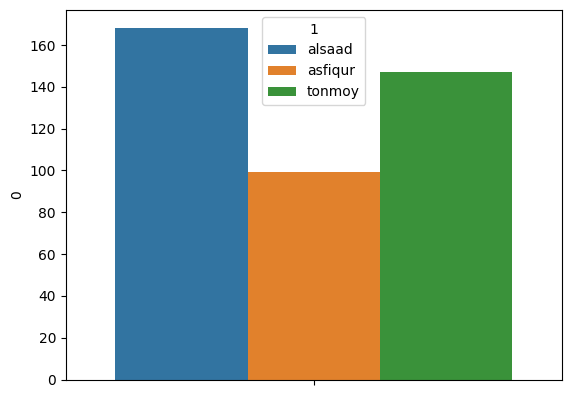

In [29]:
import seaborn as sns
sns.barplot(df,y=0,hue=1)

In [27]:
2500 / 140

17.857142857142858

5213.0

In [58]:
import json
from datetime import datetime

with open(f'../data/1_labeled/alsaad_phase1/labels.json','r') as f:
    labels = json.load(f)

for label in labels:
    for key in label:
        strsplit = label[key].split(".")
        if len(strsplit) == 2:
            strsplit = strsplit[:-1]
        label[key] = strsplit[0]

labels = [
    {
        "start": label["start"],
        "end": label["end"],
        "duration": (datetime.strptime(label["end"], '%Y-%m-%d %H:%M:%S') - datetime.strptime(label["start"], '%Y-%m-%d %H:%M:%S')).total_seconds()
    }
    for label in labels
]
with open(f'../data/1_labeled/alsaad_phase1/regions.json','r') as f:
    regions = json.load(f)
for region in regions:
    for key in region:
        strsplit = region[key].split(".")
        if len(strsplit) == 2:
            strsplit = strsplit[:-1]
        region[key] = strsplit[0]
regions = [
    {
        "start": region["start"],
        "end": region["end"],
        "duration": (datetime.strptime(region["end"], '%Y-%m-%d %H:%M:%S') - datetime.strptime(region["start"], '%Y-%m-%d %H:%M:%S')).total_seconds()
    }
    for region in regions
]

print(sum([label['duration'] for label in labels])/3600)
print(sum([region['duration'] for region in regions])/3600)

1.4480555555555557
23.886944444444445
